# Data Cleaning Techniques
This notebook demonstrates three common data cleaning techniques:
1. Inconsistent Data Formats
2. Handling Missing Data
2. Removing or Treating Outliers


## 1. Inconsistent Data Formats

When working with real-world datasets, you’ll often encounter inconsistent data formats.

Here we will:
- Fix common issues like inconsistent dates, messy text fields, and invalid ranges to improve the quality of analysis.

### Load the DataSet
First, let’s load the dataset into a DataFrame to identify inconsistencies.

In [3]:
import pandas as pd

# Load the dataset
data_inconsistencies = {
    'id': [1, 2, 3, 4, 5, 5],
    'city': [' New York', 'ny', 'NY ', 'Los Angeles', 'New York', 'New York'],
    'age': [25, 30, 45, -5, 25, 25]
}
df_inconsistencies = pd.DataFrame(data_inconsistencies)
print("Original DataFrame:")
print(df_inconsistencies)

Original DataFrame:
   id         city  age
0   1     New York   25
1   2           ny   30
2   3          NY    45
3   4  Los Angeles   -5
4   5     New York   25
5   5     New York   25


### Correcting Typos and Inconsistent Spellings
City names have inconsistent capitalization and extra spaces. Let’s clean them by converting them to a consistent format.

In [4]:
df_inconsistencies['city'] = df_inconsistencies['city'].str.lower().str.strip().str.title()
print("\nDataFrame with Cleaned City Names:")
print(df_inconsistencies)


DataFrame with Cleaned City Names:
   id         city  age
0   1     New York   25
1   2           Ny   30
2   3           Ny   45
3   4  Los Angeles   -5
4   5     New York   25
5   5     New York   25


### Validating Data Ranges
The age column has invalid values like negative numbers. We’ll remove rows where age isn’t within the valid range (> 0).

In [5]:
df_inconsistencies = df_inconsistencies[df_inconsistencies['age'] > 0]
print("\nDataFrame with Valid Ages:")
print(df_inconsistencies)


DataFrame with Valid Ages:
   id      city  age
0   1  New York   25
1   2        Ny   30
2   3        Ny   45
4   5  New York   25
5   5  New York   25


### Removing Duplicates
The dataset contains duplicate rows. Let's remove them.

In [6]:
df_inconsistencies = df_inconsistencies.drop_duplicates()
print("\nDataFrame with Duplicates Removed:")
print(df_inconsistencies)


DataFrame with Duplicates Removed:
   id      city  age
0   1  New York   25
1   2        Ny   30
2   3        Ny   45
4   5  New York   25


## 2. Handling Missing Data
Missing data is one of the most common issues in datasets. Techniques to address it include:

- **Removal**: Dropping rows or columns with missing values if they are not significant and doesn't affect the overall dataset.
- **Imputation**: Filling in missing values with mean, median, mode, or other estimates.

Here we will:
- Visualise missing data using a heatmap. `Heatmaps` highlight missing data patterns clearly.
- Handle missing data by imputing with the mean.

### Dataset Setup
Use a simple dataset with missing values in one column.

Original Dataset:
    Age   Income  Score
0  25.0  50000.0   85.0
1  30.0  60000.0    NaN
2   NaN  70000.0   78.0
3  40.0      NaN   90.0
4  35.0  55000.0   88.0
5   NaN      NaN   76.0
6  50.0  65000.0    NaN


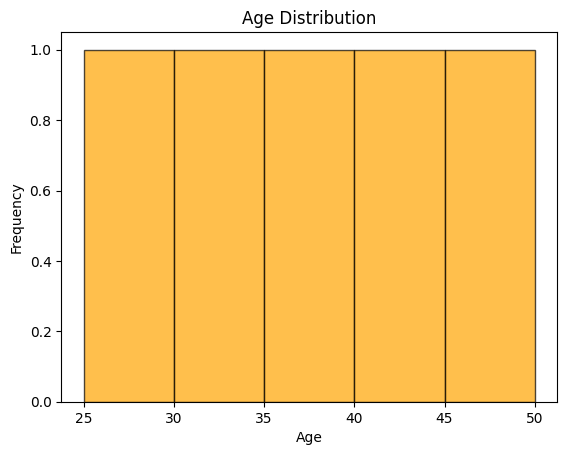

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset
data = {'Age': [25, 30, None, 40, 35, None, 50],
        'Income': [50000, 60000, 70000, None, 55000, None, 65000],
        'Score': [85, None, 78, 90, 88, 76, None]}
df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

#Visualise distribution of Age
plt.hist(df['Age'], bins=5, alpha=0.7, color='orange', edgecolor='black')  # Plot histogram
plt.title('Age Distribution')  # Add title
plt.xlabel('Age')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the histogram

### Visualise Missing Data
A heatmap will help visualise where the missing values are in the dataset.

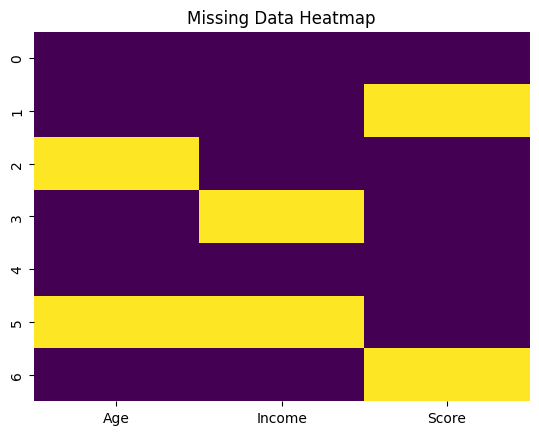

In [11]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Highlight missing values (yellow blocks)
plt.title('Missing Data Heatmap')  # Add a title to the plot
plt.show()  # Display the heatmap

### Remove Rows with Missing Values
Rows with any missing value are removed from the dataset.

In [12]:
df_removed = df.dropna()  # Drop rows with missing values
print("\nDataset after removing rows with missing values:")
print(df_removed)  # Display the cleaned dataset without missing rows


Dataset after removing rows with missing values:
    Age   Income  Score
0  25.0  50000.0   85.0
4  35.0  55000.0   88.0


### Visualise Distribution After Removing Rows
Visualise the distribution of `Age` in both databases.

A histogram shows how removing rows affects the distribution of the `Age` column.

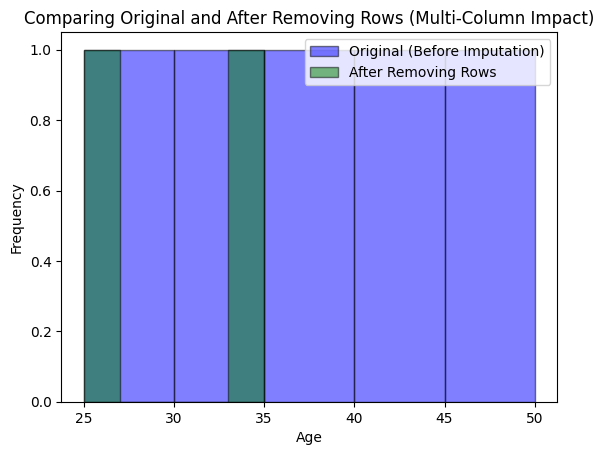

In [13]:
# Plot Original Distribution
plt.hist(df['Age'], bins=5, alpha=0.5, label='Original (Before Imputation)', color='blue', edgecolor='black')  

# Plot After Removing Rows
plt.hist(df_removed['Age'], bins=5, alpha=0.5, label='After Removing Rows', color='green', edgecolor='black')  

# Add title and labels
plt.title('Comparing Original and After Removing Rows (Multi-Column Impact)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Impute Missing Values
Fill missing values in each column with appropriate statistical methods.
- `Mean`: The average of all values. Best for numerical data with a normal distribution.
- `Median`: The middle value in an ordered list. Effective for skewed numerical data.
- `Mode`: The most frequently occurring value. Suitable for categorical data.

In [14]:
df_imputed = df.copy()  # Make a copy of the dataset to preserve the original
df_imputed['Age'] = df_imputed['Age'].fillna(df['Age'].mean())  # Fill missing 'Age' values with the mean
df_imputed['Income'] = df_imputed['Income'].fillna(df['Income'].median())  # Fill missing 'Income' values with the median
df_imputed['Score'] = df_imputed['Score'].fillna(df['Score'].mode()[0])  # Fill missing 'Score' values with the mode
print("\nDataset after imputing missing values:")
print(df_imputed)  # Display the dataset after imputation


Dataset after imputing missing values:
    Age   Income  Score
0  25.0  50000.0   85.0
1  30.0  60000.0   76.0
2  36.0  70000.0   78.0
3  40.0  60000.0   90.0
4  35.0  55000.0   88.0
5  36.0  60000.0   76.0
6  50.0  65000.0   76.0


### Visualise Distribution After Imputation
Visualise the distribution of `Age` after imputing missing values.

A histogram shows how imputation affects the distribution of the `Age` column.

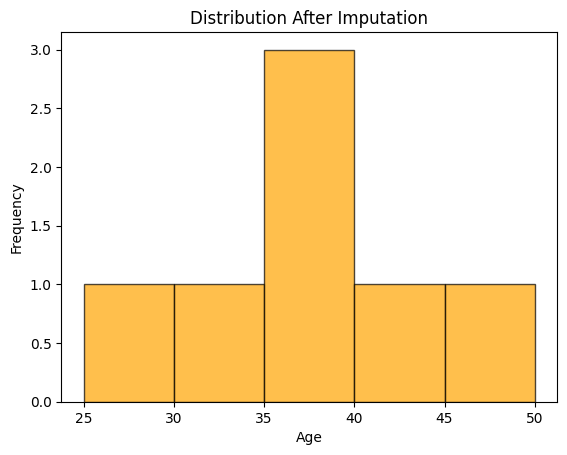

In [15]:
plt.hist(df_imputed['Age'], bins=5, alpha=0.7, color='orange', edgecolor='black')  # Plot histogram
plt.title('Distribution After Imputation')  # Add title
plt.xlabel('Age')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the histogram

### Compare All Distributions
Compare original, removed rows, and imputed distributions.

Overlay all distributions to visualise how removal and imputation impact the data.

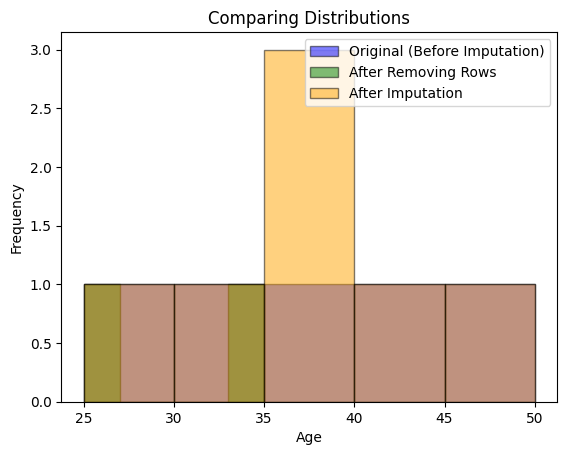

In [16]:
plt.hist(df['Age'], bins=5, alpha=0.5, label='Original (Before Imputation)', color='blue', edgecolor='black')  # Original data
plt.hist(df_removed['Age'], bins=5, alpha=0.5, label='After Removing Rows', color='green', edgecolor='black')  # After removing rows
plt.hist(df_imputed['Age'], bins=5, alpha=0.5, label='After Imputation', color='orange', edgecolor='black')  # After imputation
plt.title('Comparing Distributions')  # Add title
plt.xlabel('Age')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Add legend to distinguish the datasets
plt.show()  # Display the overlayed histograms

## 3. Identifying or Removing Outliers
Outliers can skew analysis results. Techniques include:

- Removal: Dropping extreme values if they are due to data entry errors or irrelevant.
- Transformation: Applying logarithmic or other transformations to reduce the impact of outliers.
- Capping: Replacing extreme values with thresholds like the 1st and 99th percentiles.

Here we will:
- Identify outliers using a box plot.
- Remove outliers using the Interquartile Range (IQR) method.

### Create Dataset
Simulates income data with one extreme value (outlier).

In [17]:
# We're simulating a dataset where one value (1,000,000) is significantly higher than the others.
data = {'Income': [50000, 60000, 70000, 1000000, 55000]}
df_income = pd.DataFrame(data)  # Create a DataFrame from the data dictionary
print("Original Dataset:")
print(df_income)  # Display the original dataset

Original Dataset:
    Income
0    50000
1    60000
2    70000
3  1000000
4    55000


### Visualising Outliers
Uses a box plot to visually identify outliers.

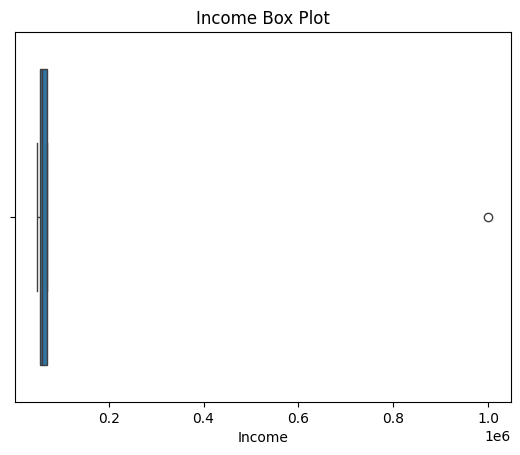

In [18]:
# Visualize outliers with a box plot
# The box plot will show the range of data and highlight outliers as points outside the whiskers.
sns.boxplot(x=df_income['Income'])  # Create a box plot for the 'Income' column
plt.title("Income Box Plot")  # Add a title to the plot
plt.show()  # Display the plot

### Calculating IQR
Computes Q1 (25th percentile), Q3 (75th percentile), and IQR to define the range of normal data.

In [19]:
# Calculate IQR and remove outliers
Q1 = df_income['Income'].quantile(0.25)
Q3 = df_income['Income'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")  # Display the calculated values

Q1: 55000.0, Q3: 70000.0, IQR: 15000.0


### Filtering Out Outliers
Defines the bounds for normal data and filters the dataset.


Cleaned Dataset (Outliers Removed):
   Income
0   50000
1   60000
2   70000
4   55000


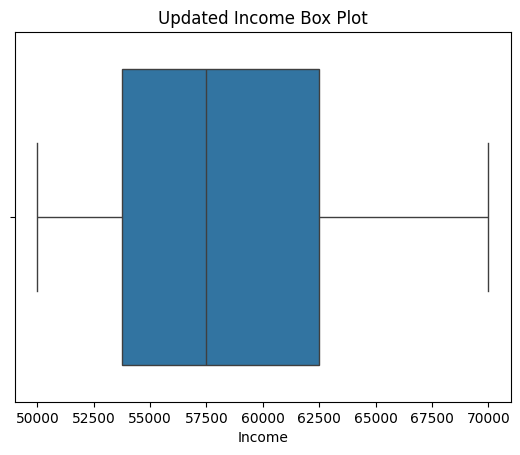

In [21]:
# Filter the dataset to include only values within the range defined by the IQR.
lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for non-outlier values
upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for non-outlier values
df_cleaned = df_income[(df_income['Income'] >= lower_bound) & (df_income['Income'] <= upper_bound)]  # Filter the dataset

print("\nCleaned Dataset (Outliers Removed):")
print(df_cleaned)  # Display the dataset after removing outliers

# Show the updated box plot
sns.boxplot(x=df_cleaned['Income'])
plt.title('Updated Income Box Plot')
plt.show()